     |████████████████████████████████| 41 kB 347 kB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.0-py3-none-any.whl size=41455 sha256=e21c8e9b84182058d53578c52670624662ecd7049048e16fac460b0a1b45b072
  Stored in directory: /root/.cache/pip/wheels/ac/00/37/1f0e8a5039f9e9f207c4405bbce0796f07701eb377bfc6cc76
Successfully built factor-analyzer
     subjnumb  kidtrans  miniboxy  lthrbetr  ...  numkids  female  educ  recycle
0           1         6         5         2  ...        1       0     1        3
1           2         3         5         3  ...        1       0     3        4
2           3         7         1         5  ...        2       1     3        3
3           4         3         5         3  ...        0       0     3        2
4           5         4         3         6  ...        1       1     3        4
..        ...       ...       ...       ...  ...      ...     ...   ...      ...
395       396         3         6         3  ...        0       0  

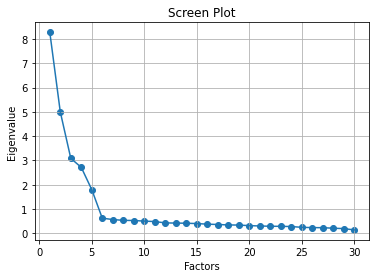

              age      income       miles     numkids      female        educ
count  158.000000  158.000000  158.000000  158.000000  158.000000  158.000000
mean    32.120253   36.575949   14.651899    0.689873    0.487342    2.050633
std      5.296745   16.235643    3.567238    0.764681    0.501429    0.772105
min     19.000000   15.000000    7.000000    0.000000    0.000000    1.000000
25%     28.000000   25.000000   12.000000    0.000000    0.000000    1.000000
50%     32.000000   32.000000   15.000000    1.000000    0.000000    2.000000
75%     36.000000   45.000000   17.000000    1.000000    1.000000    3.000000
max     48.000000  131.000000   24.000000    4.000000    1.000000    3.000000
              age      income       miles     numkids      female        educ
count  126.000000  126.000000  126.000000  126.000000  126.000000  126.000000
mean    46.055556  103.873016   18.436508    1.214286    0.555556    3.261905
std      5.918521   43.424783    3.540612    0.992831    0.49888

[-1.5995498147495253,
 -0.6454911848092563,
 -1.1536513238605939,
 -0.11485513072120533,
 -0.33164772635228346]

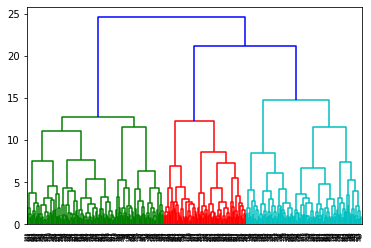

In [1]:
#Insert Factor Analyzer Package
!pip install factor_analyzer
#Import packages to compute and analyze data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity 
from factor_analyzer.factor_analyzer import calculate_kmo
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
def load_data(file):                                                    
    return pd.read_csv(file, sep = ",", index_col = False)
def plot_eigenvalue(eigenvalues):
    plt.figure(1)
    plt.scatter(range(1,len(eigenvalues) + 1), eigenvalues)
    plt.plot(range(1,len(eigenvalues) + 1), eigenvalues)
    plt.title('Screen Plot')
    plt.xlabel('Factors')
    plt.ylabel('Eigenvalue')
    plt.grid()
    plt.show()
def order_loadings(load_mat, bases):
    load_mat_ord = pd.DataFrame(columns = range(1, len(load_mat[0]) + 1))
    for i in range(0, len(load_mat[0])):
        for j in range(0, len(load_mat)):
            if (np.argmax(abs(load_mat[j])) == i):
                load_mat_ord.loc[bases.columns[j]] = load_mat[j]
    return load_mat_ord
#upload data
df=load_data("minivan.csv")
# shift column 'mvliking' to thirty-first position
thirtyfirst_column = df.pop('mvliking') 
# insert column using insert(position,column_name,first_column) function
df.insert(31, 'mvliking', thirtyfirst_column) 
print(df)
#Determine Bases variables, and non-bases variables
bases=df.iloc[:, 1:31]
#demographics
demog=df.iloc[:,32:38]
#Get the P-value from the bartlett test to ensure data bases have variance 
#and are independent
_, p_value= calculate_bartlett_sphericity(bases)

#You want a Bartlett test p_value to be less than 0.05
if (p_value> 0.05):
  print("ERROR: Barlett test failed")

#KMO test is used to measure sample adequacy
#Run KMO test
_,kmo_value=calculate_kmo(bases)
    
#You want a kmo value more than 0.6
if (kmo_value< 0.6):
  print("ERROR: KMO test failed")

#Return how many items in a container
FA=FactorAnalyzer(n_factors= len(bases.columns),rotation=None)

FA.fit(bases)

#Eigen values helps to evaluate how many factor should be considered 
#when condensing the data
eigen,_=FA.get_eigenvalues()

plot_eigenvalue(eigen)
final_num_factors = 5

FA_final = FactorAnalyzer(n_factors= final_num_factors, rotation= "varimax")
FA_final.fit(bases)

#Reduces bases down to the 5 columns which mak it simpler to analyze data
red_mat=FA_final.fit_transform(bases)


load_mat= FA_final.loadings_


load_mat_ord=order_loadings(load_mat, bases)

#Make sure these are in the correct order(put the names in order)
factor_names=["Looks&Design","Vehicle Size","Storage","Environmental Impact","Risk"]

#Clustering
dendrogram(linkage(red_mat, method='ward'))
num_clusters=3

kmeans_model = KMeans(n_clusters = num_clusters, random_state = 0).fit(red_mat)
customer_assignment = kmeans_model.labels_

centers=kmeans_model.cluster_centers_

#Profiling
cluster_names = ["Sizer, Stylish, Everything Matters"]

#This tells me to keep the rows where people are assigned to the 0 
#cluster-"health seekers"
demog.iloc[customer_assignment==0, :].describe()

#Use this to find the description of each customer in each cluster
#Use the for loop below
for segment in range (0, num_clusters):
  print(demog.iloc[customer_assignment==segment, :].describe())

customer_ten=[x for x in red_mat[9]]
customer_ten









# New Section